Tämä harjoitustyö oli hyödyllinen, että tuli kerrattua ja virkistettyä muistia monenkin kurssiosan ja tehtvien ratkaisuja
Minulle tämä oli kun oli tavaölaan henk. kohtaista dataa eli pyöräilyaktiviteetteja

Ylimääräistä päänvaivaa lisäsi data-aineiston puutteet tiettyjen suureiden osalta, myös oman luokituksen tekeminen 
myös haastavaa, mutta antoisaa ;)
Oli lopulta opettvainen prosessi vaikkain varisnain syvöoppiminen oli lähennä meLearning
deepkearnig -> meLearinng syväluotaus ja analytiikkaa omiin suorituksiin liittyen
En ole aivan varma osuiko kaikki ilmaisut ihan kohdilleen.



# Osa 4 - Syväoppiminen harjoitustyö (15 p)


## Tehtävä 4-1
### Aihe: Syväoppimisen toteutussuunnitelma + aineiston valinta (3 p)

1. Valitse aineistosi tehtävään vapaasti esimerkiksi oman kiinnostuksen tai työn pohjalta. 
   1. Tutustu aineistoon kunnolla
2. Esikäsittele data 
   1. Optimoi koneoppimismallille syötettävää dataa
   2. voit poistaa "tarpeettomat piirteet" oman harkinnan mukaan
   3. poikkeavien tai tyhjien data-arvojen käsittely
3. Normalisoi data 
   1. Valitse sopiva skaalaustapa
4. Valitse luokkamuuttuja 
5. Visualisoi dataa muutamilla eri kuvioilla. 


## Tehtävä 4-2 POISTA tämä lopussa
### Aihe: Syväoppimisen toteutus (8 p)

1. Valitse sovellettava(t) syväoppimismalli(t) tehtävää varten
   1. Voit kokeilla esim. kahta eri tapaa
   2. Hyperparametrien kokeileminen parempien tuloksien saamiseksi on myös suotavaa
   3. Vertailun vuoksi toteutuksen voi tehdä myös jollakin soveltavalla koneoppimismallilla
2. Jaa aineisto koulutus- ja testausaineistoon
3. Toteuta syväoppiminen valitulla algoritmilla
   1. Se voi olla myös kurssin luentojen ulkopuolelta haettu ratkaisu
4. Laske luokittelutuloksen ennusteen tarkkuus ja sekaannusmatriisi 
   1. sekä mahdollisesti muita tunnuslukuja

## Tehtävä 4-3
### Aihe: Tulosten analysointi (4 p)

1. Analysoi ja vertaile malleilla saamiasi oppimistuloksia
2. Kuinka syväoppiminen eri menetelmillä sujui valitun aineiston ja valittujen menetelmien kohdalla
3. Kuinka hyvin menetelmä toimi?
4. Mitä kehitettävää syväoppimismallissa tai esikäsittelyvaiheessa havaitset? 
   1. dokumentoi mahdolliset kehityskohteet
5. Kuinka voisit optimoida syväoppimismallia?
6. Muita huomioita tehtävästä?


# Pyöräily aktiviteettien analytikkaa

Joskus haluaisi pyöräilyaktiviteeteista tietoja/yhteenvetoja/vertailuja, joita Strava-palvelun ilmainen versio ei tarjoa.

### Aineisto

Aineistoksi valitsin oman pyöräilyaktiviteetit viimeisen 10 vuoden ajalta. \
Data on tallenettu Strava-palveluun \
https://www.strava.com  \
Data saadaan tilattua zip-pakettina sähköpostiin.


### Datan esikäsittely   
Ennen esikäsittelyä tulee määrittää mitä datalla halutaan tehdä, mikä on päämäärä. \
Esikäsittelyä ei välttämättä tehdä heti alkuun kokonaan vaan tarpeen mukaan ja tapauskohtaisesti. \
Kone- ja syväoppimisen tulosten kannalta on tärkeää, että 1. vaiheen eli esikäsittelyn tuloksena data on \
virheetöntä ja eheää. Mikään menetelmä ei osaa korvata/korjata huonosti valmisteltua aineistoa/dataa. \
Tämän tehtävän esikäsittelyn yksi tarkoitus on selvittää ja määrittää se mihin suureisiin aineiston aktiviteettien \
hyvyysluokitus voidaan perustaa. Tarkoituksena on luokitella aktiviteetit kouluarosanoin 0-5.\
Luokituksen vuoksi keskitytään sen kannalta oleellisiin suureisiin.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

df = pd.read_csv("./data/activities.csv",delimiter=",")

# valitaan nimenomaan pyöräily aktiviteetit
df = df[df['Activity Type'] == 'Ride']

columns=['Activity ID','Activity Name','Activity Date','Moving Time','Distance','Average Speed','Average Heart Rate','Max Heart Rate','Average Watts','Calories']
df=df[columns]


# tutkitaan aluksi NaN kentät
# näiden suodatus datasta tehdään tapauskohtaisesti
print(f'Pyöräilyaktiviteetteja yhteensä {df.shape[0]}')
print()
print("Eri kenttien NaN -arvojen summat:")
display(df.isna().sum())


Pyöräilyaktiviteetteja yhteensä 2502

Eri kenttien NaN -arvojen summat:


Activity ID              0
Activity Name            0
Activity Date            0
Moving Time              0
Distance                 0
Average Speed         1642
Average Heart Rate    1305
Max Heart Rate        1301
Average Watts           37
Calories               656
dtype: int64

Datan puutteet näyttävät pahoilta usean suureen osalta. Tehtävän kannalta ne eivät ole kuitenkaan oleellisia vaan \
antaisivat ollessaan pientä lisäarvoa. Koska tarkoituksena on huomioida aktiviteettien dataa ajalta 2012-2022, \
niin poistetaan ko. kenttien huomioiminen. \
Seuraavassa kuitenkin selvitystä siitä mistä puutteet saattavat johtua.

#### Average Speed

Puutteet datassa johtunee siitä, että osa datasta on siirretty toisesta palvelusta Strava-palveluun \
ja ko. suuretta palvelu ei ole laskenut vaan laskee sen ainostaan heti uuden aktiviteetin latauksen yhteydessä.

<div style="background-color:GhostWhite;padding-left:10px">    

Koska 'Average Speed' sarakkeessa on aivan liikaa puuttuvaa dataa, analyysit jäisivät sen osalta paljon suppeammiksi. <br>
Onneksi arvot voidaan korvata johtamalla/laskemalla ne 'Distance' ja 'Moving Time' kenttien arvoista, <br> 
samalla sarakkeiden arvot tulevat olemaan tutumpaa muotoa km/h.
</div>

In [100]:
df['Average Speed']=df['Distance'] / (df['Moving Time'] / 3600)

#### Heart Rate (Average, Max)

Puutteet datassa yksinkertaisesti johtuu siitä ettei sykemittausta ole ollut käytössä kaikkina kertoina.

#### Average Watts

Ei varsinaista selitystä, kysessä on palvelun laskema estimaatti, joka on jäänyt laskematta syystä tai toisesta.

#### Calories

Samoin kuin 'Average Watts' kyseessä on palvelun laskema estimaatti, joka on syystä tai toisesta jäänyt laskematta. 

In [103]:
# poistetaan em. vuoksi eräitä sarakkeita dataframesta
df2 = df.drop(['Activity ID','Max Heart Rate','Average Heart Rate','Calories'], axis=1)
# poistetaan ne rivit joissa 'Average Watts' on NaN
rowsToDrop = df2.loc[(df2['Average Watts'].isnull())].index
df2.drop(rowsToDrop,inplace=True) 
display(df2.isna().sum())
display(df2.shape[0])

Activity Name    0
Activity Date    0
Moving Time      0
Distance         0
Average Speed    0
Average Watts    0
dtype: int64

2465

Nyt näyttää hyvältä

### Poikkeavat arvot
Esim. seaborn regplot-metodilla voidaan visualisoida dataa hyvin yksinkertaisesti. \
Graafista voidaan helposti huomata poikkeavat arvot.

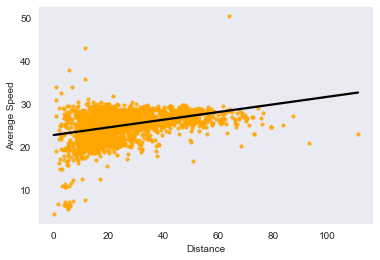

(2465, 6)


In [107]:
def regplot(df,columns):
    sns.set_style('dark')
    plt.figure()
    
    #plt.gcf().set_size_inches(17, 10)
    columns=columns
    sns.regplot(x = columns[0] , 
                    y = columns[1], 
                    data = df,scatter_kws={"color": "orange",'s':10}, line_kws={"color": "black"},ci=None)
    plt.show()
    
regplot(df2,['Distance','Average Speed'])
print(df2.shape)

Huomataan, että muutama nopeus-arvo on liian suuri. \
Koska edellä Average Speed johdettiin Distance ja 'Moving Time' arvoista niin jompi kumpi on kirjautunut väärin. \
Kyseiset datarivit poistetaan koska emme halua virheellistä dataa analyyseihin vääristämään tulosta. \
Tiedän kokemuksesta, että yli 36km/h keskinopeus on pielessä ellei ole kysymys hyvin lyhyestä testistä, jos näin niin \
ei kelpuuteta analyyseihin erityistapauksia. \
Tulostetaan kaikki yli 36 km/h suoritukset, sekä alle 5km pituiset suoritukset.

In [108]:
tulosta=df2.loc[(df2['Average Speed']>36)]
display(tulosta)

tulosta=df2.loc[(df2['Distance']<5)]
display(tulosta[:5])
print(len(tulosta))

,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
629,"03/06/2015 Torremolinos, Andalucía, Spain","Jun 3, 2015, 11:53:55 AM",544.0,5.72,37.852941,457.566010
1929,Evening Ride,"May 25, 2012, 4:36:48 PM",971.0,11.55,42.821833,203.528549
2057,Afternoon Ride,"Jun 26, 2014, 12:48:12 PM",4565.0,63.81,50.321139,609.448181


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
52,"11/11/2013 Málaga, Andalucía, Spain","Nov 11, 2013, 1:14:10 PM",615.0,3.87,22.653659,287.355988
66,"01/15/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 15, 2013, 10:57:29 AM",120.0,1.03,30.900000,237.153000
67,"01/22/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 22, 2013, 10:01:50 AM",787.0,3.90,17.839898,229.059998
69,"01/22/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 22, 2013, 10:47:52 AM",470.0,2.10,16.085106,251.947006
70,"01/22/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 22, 2013, 10:30:15 AM",489.0,2.63,19.361963,272.729004


57


Koska em. arvot eivät ole normaaleja, poistetaan ko. rivit datasetistä ja tarkistetaan ja visualisoidaan tilanne uudestaan.


In [111]:
# rajataan pois epäkurrantteja rivejä
df2=df2.loc[~(df2['Average Speed']>35)]
df2=df2.loc[~(df2['Distance']<5)]

# tarkistetaan, että em. toimenpiteet toteutuivat
tulosta=df2.loc[(df2['Average Speed']>35)]
print(tulosta)
tulosta=df2.loc[(df2['Distance']<5)]
print(len(tulosta))


Empty DataFrame
Columns: [Activity Name, Activity Date, Moving Time, Distance, Average Speed, Average Watts]
Index: []
0


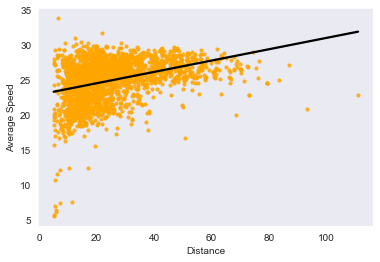

(2404, 6)

In [110]:
regplot(df2,['Distance','Average Speed'])
(df2.shape)

Voidaan havaita, että poikkeavien arvojen poisto onnistui.

### Riippuvuussuhteet/korrelaatiot

,Moving Time,Distance,Average Speed,Average Watts
Moving Time,1.000000,0.974971,0.168723,0.064662
Distance,0.974971,1.000000,0.359912,0.220676
Average Speed,0.168723,0.359912,1.000000,0.847092
Average Watts,0.064662,0.220676,0.847092,1.000000


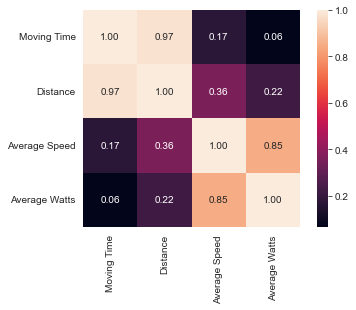

In [115]:
display(df2.corr())

sns.heatmap(df2[columns].corr(), annot=True, fmt=".2f", square = True)
plt.show()

Se mikä kiinnosta niin suureilla 'Average Speed' ja 'Average Watts' näyttäisi olevan melko hyvä riippuvuussuhde. 

Muutetaan vielä aktiviteetin aikaleimaa sopivampaan/helpompaan muotoon\
ja lisätään muutama aikasarake valmiiksi niin on helpompi tehdä yhteenvetoja/analyysia aikajaksoihin liittyen.

In [116]:
# muutetaan formaati toiseksi niin on helpompi käsitellä
df2['Activity DateTime']=pd.to_datetime(df2['Activity Date'])

# lisätään pari kenttää
df2['Year'] = df2['Activity DateTime'].dt.year
df2['Month'] = df2['Activity DateTime'].dt.month
df2['Week'] = df2['Activity DateTime'].dt.isocalendar().week 
df2['Dayofweek'] = df2['Activity DateTime'].dt.dayofweek
df2['Daynameofweek'] = df2['Activity DateTime'].dt.day_name()


## Aineiston analysointia

#### Datan tunnusluvut 
Valittujen suureiden tunnusluvut saadaan helposti yhdellä kertaa esille dataframen decribe-funktiolla.

In [62]:
columns=['Moving Time','Distance','Average Speed','Average Watts']
display(df2[columns].describe())

,Moving Time,Distance,Average Speed,Average Watts
count,2404.000000,2404.000000,2404.000000,2404.000000
mean,3543.536606,24.742517,24.872511,274.825229
std,1818.553108,13.545253,3.053123,42.288627
min,650.000000,5.020000,5.483304,52.061058
25%,2309.750000,15.320000,23.087130,249.701523
50%,3053.000000,21.020000,25.534660,280.815506
75%,4273.500000,30.335000,27.030117,305.075500
max,17522.000000,111.070000,33.798009,373.770325


#### Datan visualisointi
Datan visualisointi on tärkeä osa analytiikkaa.
Dataa voidaan kätevästi ja yksinkertaisesti esittää visualisesti, esim. seuraavassa keskeisten muuttujien historgrammit   

[]

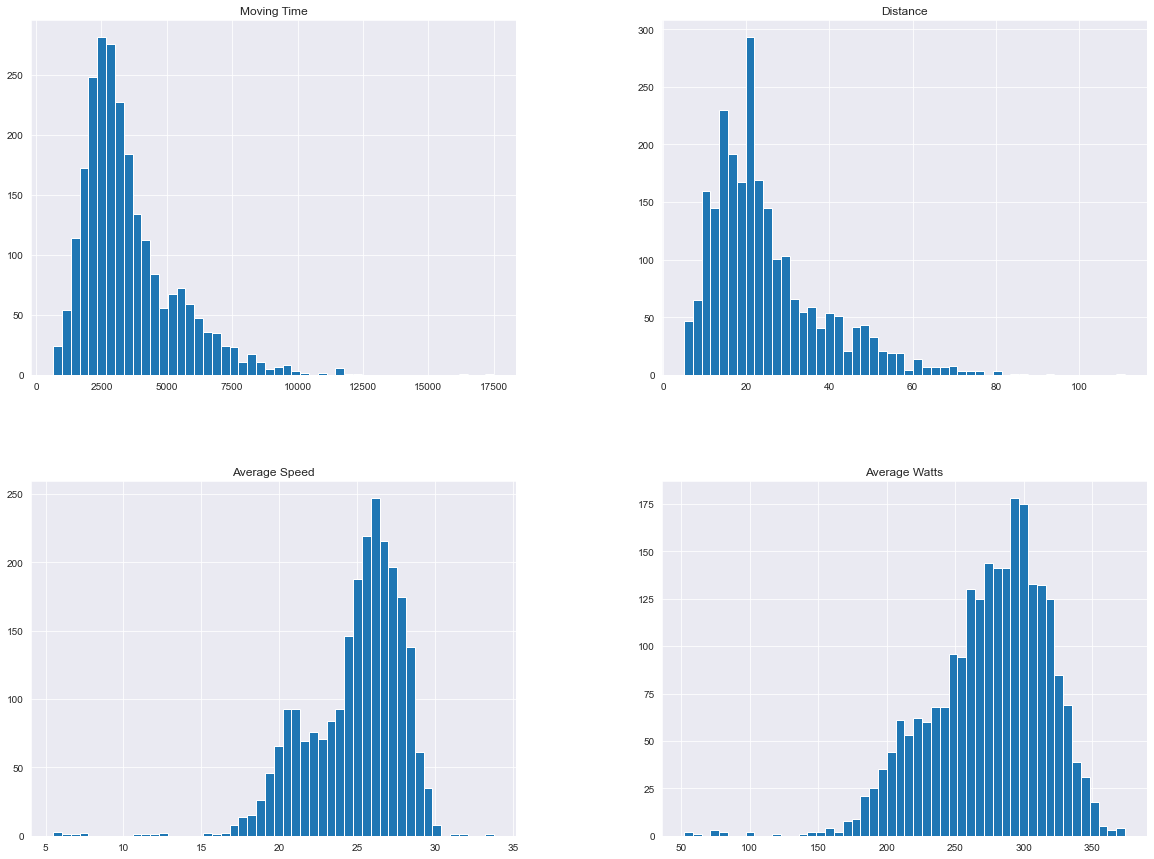

In [63]:
df2[columns].hist(bins=50,figsize=(20,15))
plt.plot()

**Voidaan havaita:** \
ajankäytön (Moving Time) suhteen suorituksista enemmistö on ollut n. 2500 sekunnin mittaisia \
matkan pituuden (Distance) suhteen suorituksista enemmistö on ollut n. 24 km mittaisia \
keskinopeuden (Average Speed) suhteen suorituksista enemmistö on ollut n. 27 km/h \
keskimääräisen tehon (Average Watts) suhteen suorituksista enemmistö on ollut n. 300 w 


#### Kilometrien summa eri vuosina

,Year,Distance
0,2012,8585.14
1,2013,8622.17
2,2014,7755.46
3,2015,6538.73
4,2016,5127.68
5,2017,4652.30
6,2018,4822.22
7,2019,2700.23
8,2020,3948.74
9,2021,3327.84


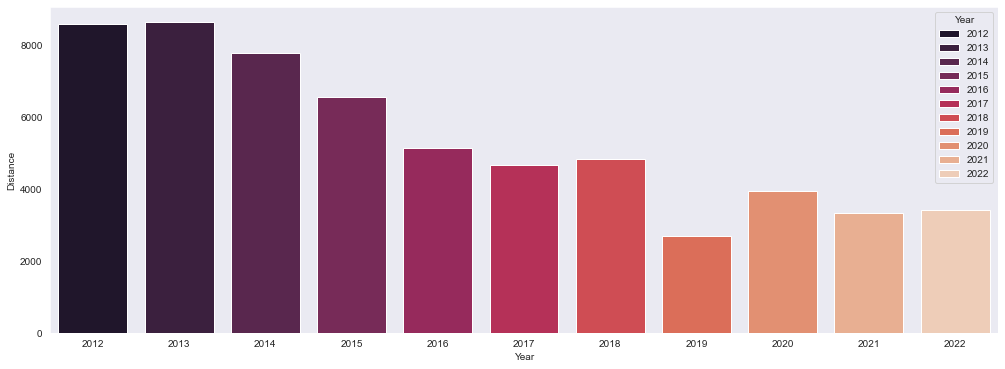

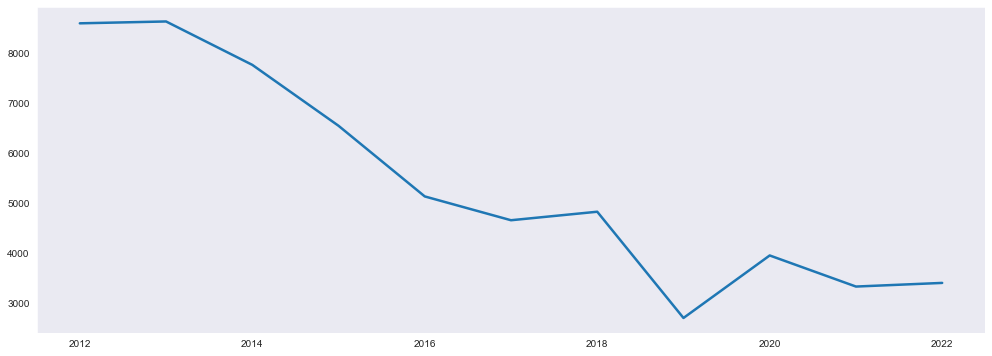

In [64]:
years=df2['Year'].unique()

distance=[]
for year in years:    
    x=df2.loc[df2['Year']==year]    
    distance.append(x['Distance'].sum())
    
distance=np.array(distance)

data={'Year':years,'Distance':distance}

data = pd.DataFrame(data)
display(data)

plt.figure()
sns.set_style('dark')
sns.barplot(x='Year', y='Distance', data=data, hue='Year', ci=None,palette = 'rocket',dodge=False)
plt.gcf().set_size_inches(17, 6)

plt.figure()
data = pd.DataFrame(distance,years)
sns.lineplot(data=data, palette="tab10", linewidth=2.5,legend=None)
plt.gcf().set_size_inches(17, 6)

Voidaan havaita, että kilometrimäärät ovat laskutendissä, maksimi savutettiin vuonna 2013 ja minimi vuonna 2019.

#### Kilometrien summa eri kuukausina

,Month,Distance
0,January,3220.90
1,February,3288.37
2,March,4403.02
3,April,4102.59
4,May,5098.04
5,June,5956.85
6,July,5389.80
7,August,5715.92
8,September,4663.90
9,October,7558.64


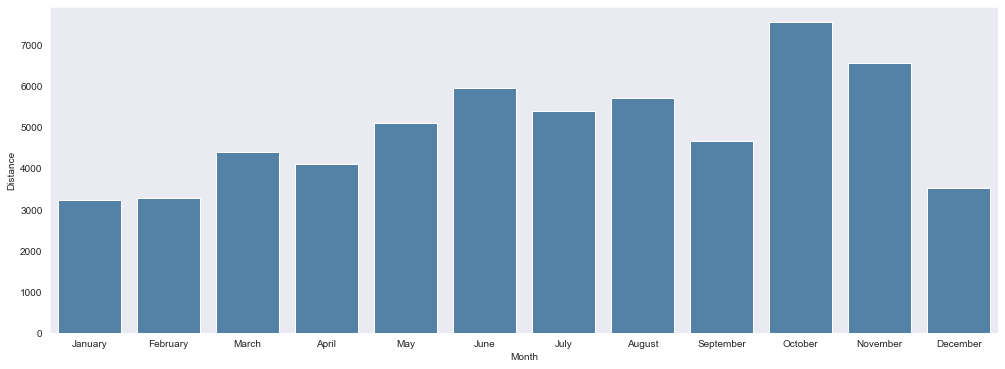

In [84]:
months=df2['Month'].unique()
months=np.sort(months)

monthNames = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October'
              , 'November', 'December']

distance=[]
mNx=[]
for month in months:
    x=df2.loc[df2['Month']==month]    
    distance.append(x['Distance'].sum())    
    mNx.append(monthNames[month-1])
    
distance=np.array(distance)
data={'Month':mNx,'Distance':distance}
data = pd.DataFrame(data)
display(data)

plt.figure()
sns.barplot(data=data,x='Month', y='Distance', ci=None, color='steelblue',dodge=False)
plt.gcf().set_size_inches(17, 6)


Voidaan nähdä, että lokakuussa on tullut eniten kilometrejä mittariin. \
Tämän selittää pyöräily Malagassa 2012-2015.

#### Kilometrien summa eri viikonpäivinä

,Day,Distance
0,Monday,6927.58
1,Tuesday,8262.56
2,Wednesday,8773.86
3,Thursday,8440.00
4,Friday,9130.97
5,Saturday,9736.52
6,Sunday,8209.52


Max
        Day  Distance
5  Saturday   9736.52


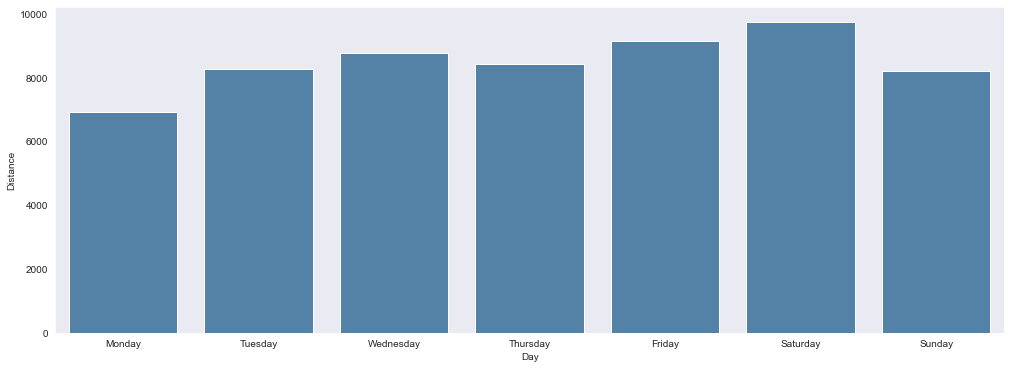

In [66]:

dayNames = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
dows=df2['Dayofweek'].unique()
dows=np.sort(dows)

distance=[]
dowNames=[]
for day in dows:    
    x=df2.loc[df2['Dayofweek']==day]    
    distance.append(x['Distance'].sum())
    dowNames.append(dayNames[day])
distance=np.array(distance)

data={'Day':dowNames,'Distance':distance}

data = pd.DataFrame(data) #,columns=['Day','Distance'])

display(data)

plt.figure()
sns.barplot(data=data, x='Day', y='Distance', ci=None, color = 'steelblue',dodge=False)
plt.gcf().set_size_inches(17, 6)

# miten saadaan maksimi viikonpäivän summa selville ja mikä ko. viikonpäivä on???
print("Max")
print(data.loc[data['Distance']==data['Distance'].max()])

Launtaisin on tullut eniten pyöräiltyä.

#### TIetyn vuoden kuukausikohtaiset kilometrien summat
Tässä esitetään vuoden (jonka aikana tuli eniten pyöräiltyä) kuukausikohtaiset summat

,Month,Distance
0,January,337.58
1,February,315.38
2,March,352.74
3,April,175.27
4,May,517.64
5,June,917.85
6,July,582.92
7,August,818.78
8,September,663.74
9,October,1522.25


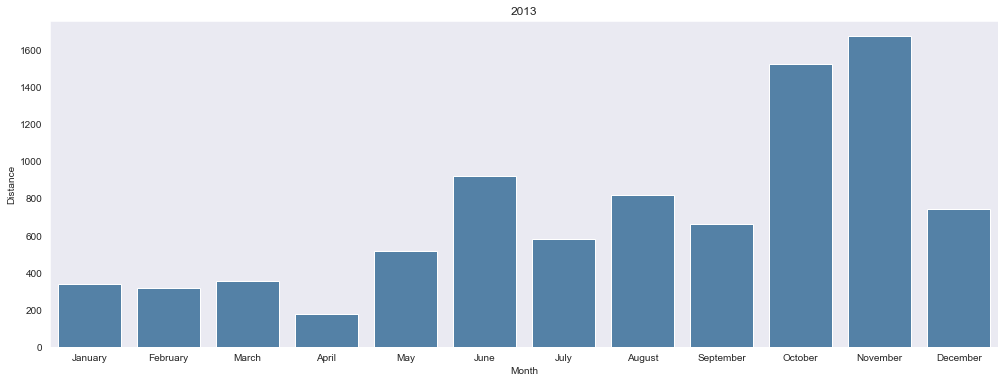

In [67]:
years=df2['Year'].unique()

distance=[]
for year in years:    
    x=df2.loc[df2['Year']==year]    
    distance.append(x['Distance'].sum())
    
distance=np.array(distance)
sortedindex = np.argsort(distance, axis=0)
maxind=sortedindex[::-1][0]

maxYear=years[maxind]

### maksimivuoden tiedot
data=df2.loc[df2['Year']==maxYear]    

distance=[]
mN=[]
for month in months:
    x=data.loc[data['Month']==month]    
    distance.append(x['Distance'].sum())    
    mN.append(monthNames[month-1])
    
distance=np.array(distance)

data={'Month':mN,'Distance':distance}
data = pd.DataFrame(data)
display(data)

plt.figure()
sns.set_style('dark')
sns.barplot(data=data,x='Month', y='Distance', ci=None, color='steelblue',dodge=False).set(title=f'{maxYear}')
plt.gcf().set_size_inches(17, 6)

Voidaan nähdä, että marraskuussa on tullut eniten kilometrejä mittariin. \
Tämän selittää pyöräily Malagassa 2013 ko. ajankohtana.

#### Kilometrien summa eri vuosien eri kuukausina

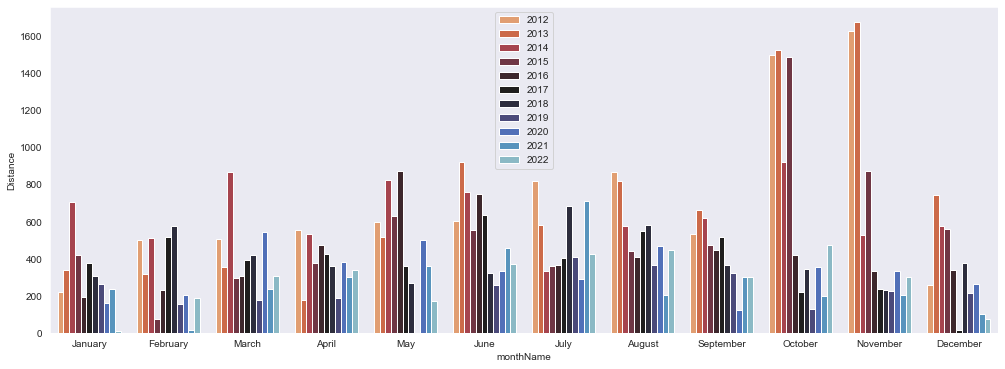

In [85]:
df2['monthName'] = df2['Activity DateTime'].dt.month_name()

plt.figure()
sns.set_style('dark')
sns.barplot(x='monthName', y='Distance', data=df2, hue='Year', ci=None, estimator=np.sum, palette = 'icefire_r',
            dodge=True,order =["January", "February", "March", "April", "May", "June", "July", "August", "September", 
            "October", "November", "December"])
plt.legend(loc='upper center')
plt.gcf().set_size_inches(17, 6)

On nähtävissä, että marraskuussa vuosina 2012-2013 on eniten kilometrejä kertynyt mittariin,\
em. vuosina myös lokakuu on myös ollut hyvä kuukausi. \
Tämä selkeä ero muihin kuukausiin selittyy sillä, että olen käynyt Malagassa pyöräilemässä ko. ajanjaksoina. 

#### Kilometrien summa eri vuodenaikoina

In [121]:
# lisätään dataframeen season-sarake, joka täytetään ko. datalla
# kevät kuukaudet 3-5, kesä 6-8, syksy 9-11, talvi 12,1,2

seasons=['Spring','Summer','Autumn','Winter']

df2.loc[(df2["Month"]>=3) & (df2["Month"]<=5), 'Season'] = seasons[0]
df2.loc[(df2["Month"]>=6) & (df2["Month"]<=8), 'Season'] = seasons[1]
df2.loc[(df2["Month"]>=9) & (df2["Month"]<=11), 'Season'] = seasons[2]
df2.loc[(df2["Month"]==1) | (df2["Month"]==2) | (df2["Month"]==12), 'Season'] = seasons[3]


,Season,Distance
0,Spring,13603.65
1,Summer,17062.57
2,Autumn,18788.20
3,Winter,10026.59


Max
   Season  Distance
2  Autumn   18788.2


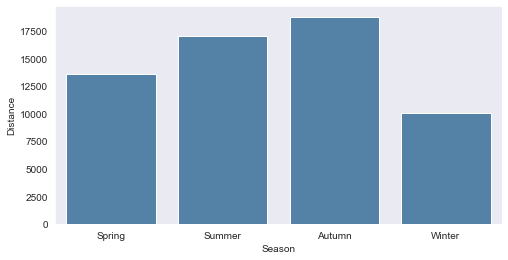

In [70]:
distance=[]
for i in range(len(seasons)):
    dfx=df2.loc[df2["Season"]==seasons[i]]
    distance.append(dfx['Distance'].sum())

sns.set_style('dark')
plt.figure()
data={'Season':seasons,'Distance':distance}
data = pd.DataFrame(data)
display(data)

sns.barplot(x='Season', y='Distance', data=data, ci=None, color='steelblue',dodge=False)
plt.gcf().set_size_inches(8, 4)

print("Max")
print(data.loc[data['Distance']==data['Distance'].max()])

Huomataan, että syksyisin on tullut eniten kilometrejä mittariin koko mittausaineisto huomioiden.

### Yksittäisiä tietoja
Yksittäisiä tietoja on varsin helppo hakea Pandas dataframesta esim. seuraavasti:

##### Vuosien 2012 - 2022 tilastoja

In [71]:
# tähän

def dropNanRowByColumn(df,column):
    rowsToDrop = df.loc[(df[column].isnull())].index
    df.drop(rowsToDrop,inplace=True) 

q=[]
a=[]

columns=['Activity Name','Activity Date','Moving Time','Distance','Average Speed','Average Watts']
lkm=df2.shape[0]

q.append(f"Aktiviteetteja yhteensä")
a.append(f"{lkm}")
sum=round(df2['Distance'].sum(),2)

q.append(f"Aktiviteettien matkojen summa")
a.append(f"{sum} km")
mean=round(df2['Distance'].mean(),2)

q.append(f"Kaikkien aktiviteettien matkojen keskiarvo ")
a.append(f"{mean} km")
max=df2['Distance'].max()

q.append(f"Pisin suoritus")
a.append(f"{round(max,2)} km")
dfMaxDist=df2.loc[(df2['Distance']==max)]
print()
mean=round(df2['Average Speed'].mean(),2)

q.append(f"Kaikkien aktiviteettien keskinopeus")
a.append(f"{mean} km/h")
max=df2['Average Speed'].max()

q.append(f"Suurin Keskinopeus")
a.append(f"{round(max,2)} km/h")
data={'Kysymys':q,'Vastaus':a}
data = pd.DataFrame(data)
display(data)

print(f"Pisimmän suorituksen tiedot")
display(dfMaxDist[columns])

print()
print("Suurimman keskinopeuden omaavan aktiviteetin tiedot")
dfMaxSpeed=df2.loc[(df2['Average Speed']==max)]             
display(dfMaxSpeed[columns])

dfx=df.copy()
col='Average Heart Rate'
dropNanRowByColumn(dfx,col)

print()
#print("Syke")
max=round(dfx[col].max(),2)
mean=round(dfx[col].mean(),2)
#data={'Syke':[''],'maksimi':[max],'keskiarvo':[mean],'yksikkö':['bpm']}
q=[]
a=[]
q.append('maksimi HR (bpm)')           
a.append(round(max,2))
q.append('HR keskiarvo (bpm)')           
a.append(mean)
q.append('Tehokkain aktiviteetti') 
max=df2['Average Watts'].max()
a.append(round(max,2))

data={'Kysymys':q,'Vastaus':a}
data = pd.DataFrame(data)
blankIndex=[''] * len(data)
data.index=blankIndex
display(data)



,Kysymys,Vastaus
0,Aktiviteetteja yhteensä,2404
1,Aktiviteettien matkojen summa,59481.01 km
2,Kaikkien aktiviteettien matkojen keskiarvo,24.74 km
3,Pisin suoritus,111.07 km
4,Kaikkien aktiviteettien keskinopeus,24.87 km/h
5,Suurin Keskinopeus,33.8 km/h


Pisimmän suorituksen tiedot


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
756,2015-11-15T14:13:11.927Z,"Nov 15, 2015, 2:13:12 PM",17522.0,111.07,22.819998,262.348999



Suurimman keskinopeuden omaavan aktiviteetin tiedot


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
459,"25/10/2014 Torremolinos, Andalusia, Spain","Oct 25, 2014, 11:25:51 AM",703.0,6.6,33.798009,339.152008


,Kysymys,Vastaus
,maksimi HR (bpm),155.79
,HR keskiarvo (bpm),135.88
,Tehokkain aktiviteetti,373.77


#### Vuoden 2013 tilastoja

In [72]:
#print("Vuoden 2013 aktiviteettien tietoja:")
year=2013
yearData=df2.loc[(df2['Year']==year)]
lkm=yearData.shape[0]
print(f"Aktiviteetteja yhteensä {lkm}")
sum=round(yearData['Distance'].sum(),2)
print(f"Aktiviteettien matkojen summa {sum} km")

max=yearData['Distance'].max()
print(f"Pisin suoritus {max} km")
dfMax=yearData.loc[(yearData['Distance']==max)]
print()
print(f"Pisimmän suorituksen tiedot")
display(dfMax[columns])

mean=round(yearData['Distance'].mean(),2)
print(f"Kaikkien aktiviteettien matkojen keskiarvo {mean} km")

mean=round(yearData['Average Speed'].mean(),2)
print(f"Kaikkien aktiviteettien keskinopeus {mean} km/h")
print()
print(f"5 pisintä matkaa vuonna {year}")
top5Distance=yearData.sort_values(by=['Distance'],ascending=False)[:5]
display(top5Distance[columns])



Aktiviteetteja yhteensä 236
Aktiviteettien matkojen summa 8622.17 km
Pisin suoritus 87.19 km

Pisimmän suorituksen tiedot


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
231,"29/11/2013 Málaga, Andalucía, Spain","Nov 29, 2013, 11:36:39 AM",11577.0,87.19,27.112724,294.987


Kaikkien aktiviteettien matkojen keskiarvo 36.53 km
Kaikkien aktiviteettien keskinopeus 25.14 km/h

5 pisintä matkaa vuonna 2013


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
231,"29/11/2013 Málaga, Andalucía, Spain","Nov 29, 2013, 11:36:39 AM",11577.0,87.19,27.112724,294.987000
54,"11/12/2013 Málaga, Andalucía, Spain","Nov 12, 2013, 12:40:55 PM",10239.0,75.66,26.601817,328.000000
225,"11/24/2013 Málaga, Andalucía, Spain","Nov 24, 2013, 11:55:44 AM",9267.0,74.52,28.949174,272.385986
30,"10/27/2013 Málaga, Andalucía, Spain","Oct 27, 2013, 2:46:31 PM",9753.0,72.83,26.882805,314.028015
237,"03/12/2013 Málaga, Andalucía, Spain","Dec 3, 2013, 12:54:11 PM",8960.0,68.87,27.670982,275.170013


#### Talvikauden tietoja vuonna 2013

In [73]:
dfSeason=yearData.loc[(yearData['Season']=='Winter')]
lkm=dfSeason.shape[0]
print(f"Aktiviteetteja yhteensä {lkm}")

sum=dfSeason['Distance'].sum()
print(f"Aktiviteettien matkojen summa {sum} km")

max=dfSeason['Distance'].max()
print(f"Pisin suoritus {max} km")
dfMax=dfSeason.loc[(yearData['Distance']==max)]
print()
print(f"Pisimmän suorituksen tiedot")
display(dfMax[columns])

mean=round(dfSeason['Distance'].mean(),2)
print(f"Kaikkien aktiviteettien matkojen keskiarvo {mean} km")

mean=round(dfSeason['Average Speed'].mean(),2)
print(f"Kaikkien aktiviteettien keskinopeus {mean} km/h")


Aktiviteetteja yhteensä 53
Aktiviteettien matkojen summa 1397.23 km
Pisin suoritus 68.87 km

Pisimmän suorituksen tiedot


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts
237,"03/12/2013 Málaga, Andalucía, Spain","Dec 3, 2013, 12:54:11 PM",8960.0,68.87,27.670982,275.170013


Kaikkien aktiviteettien matkojen keskiarvo 26.36 km
Kaikkien aktiviteettien keskinopeus 23.1 km/h


## Lineaarinen regressio

Suoritetaan regressio matkan ja keskinopeuden suhteen. Regression avulla voidaan ennustaa matkan perusteella keskinopeus.

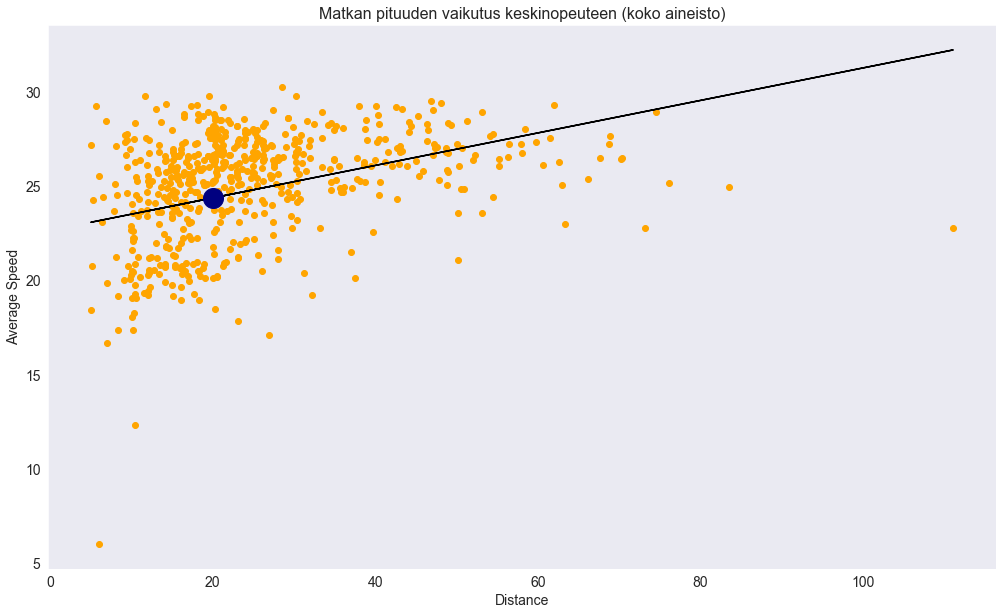

Matka 20 km, arvioitu keskinopeus on 24.4 km/h


In [119]:

from sklearn.linear_model import LinearRegression
def linearRegression(df,columns,value,text):

    X = np.array(df[columns[0]]).reshape(-1, 1)
    y = np.array(df[columns[1]]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    sns.set_style('dark')
    plt.figure()
    plt.gcf().set_size_inches(17, 10)
    plt.scatter(X_test, y_test, color ='orange')
    plt.plot(X_test, y_pred, color ='k')
    
    x_pre = [[value]]    
    y_pre = model.predict(x_pre)
    
    plt.plot(x_pre,y_pre, marker='o', c="navy", ms=20,ls='none')

    plt.xlabel(columns[0], size=14)
    plt.ylabel(columns[1], size=14)
    plt.title(f"{text}",size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()
    return y_pre

columns=['Distance','Average Speed']
value=20
text="Matkan pituuden vaikutus keskinopeuteen (koko aineisto)"
result=linearRegression(df2,columns,value,text)
print(f'Matka {value} km, arvioitu keskinopeus on {round(result[0][0],2)} km/h')

Yleisesti ottaen luulisi vauhdin/nopeuden hyytyvän kun matka pitenee tietyn rajan yli, mutta \
kaaviosta voidaan havaita, että vauhti ei hidastu matkojen pidentyessä. \
Tähän on selitys: ensinnäkin nyt käytetty aineisto on 10 vuoden ajalta niin muutosta on tapahtunut siten, että pidempiä \
matkoja ei tule enää harrastettua, lisäksi ajan hyvin tasaisesti matkan kuin matkan ja matkojen pituus on pysynyt tietyssä \
pienessä vaihteluvälissä jolloin on voinut määrätietoisen tehokkaasti tehdä suoritukset. 

Voidaan tehdä koe vaikka viime vuodesta 2021 niin tilanne onkin varmaan toinen.

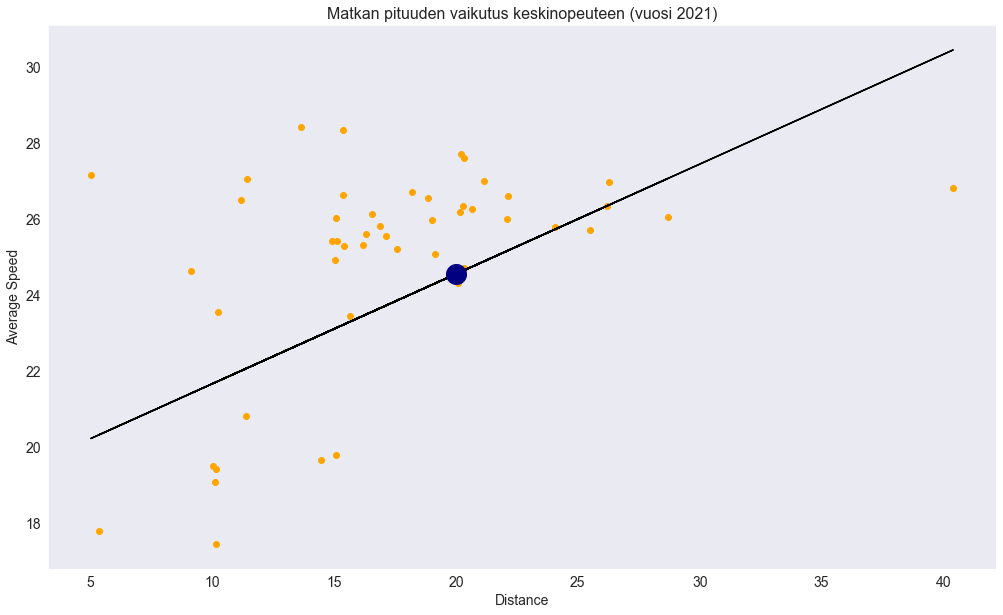

Matka 20 km, arvioitu keskinopeus on 24.57 km/h


In [123]:
data=df2.loc[(df2['Year']==2021)]
value=20
text="Matkan pituuden vaikutus keskinopeuteen (vuosi 2021)"
result=linearRegression(data,columns,value,text)
print(f'Matka {value} km, arvioitu keskinopeus on {round(result[0][0],2)} km/h')

Tuli todistettua, että nopeus on säilynyt matkojen lyhentyessä. \
Mutta mites talviaikana?

(536, 13)

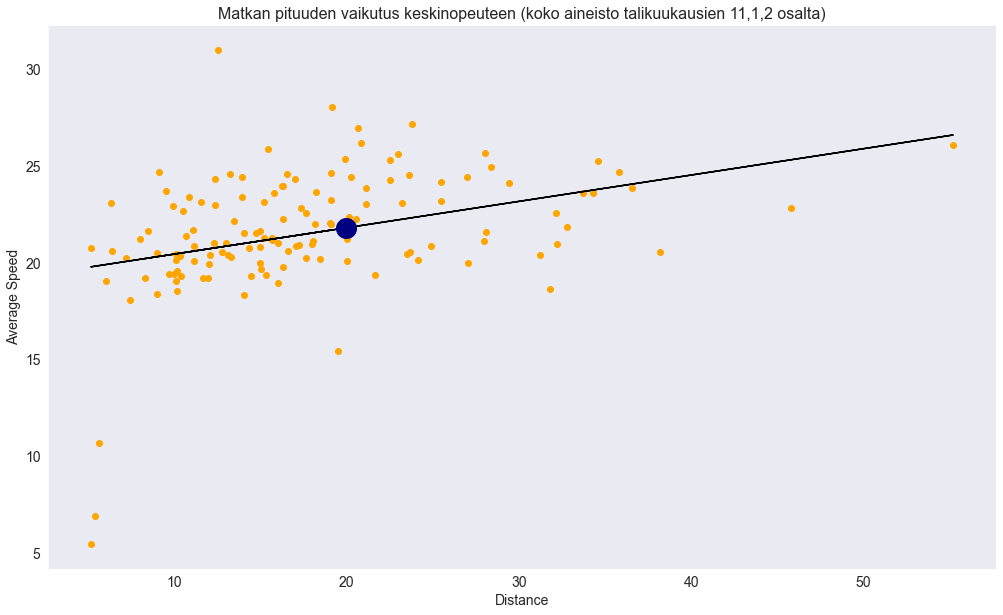

Matka 20 km, arvioitu keskinopeus on 21.83 km/h 


In [122]:
def getSeason(month):
    seasons=['Spring','Summer','Autumn','Winter']
    
    if (month>=3) & (month>=5):
        return seasons[0]
    elif (month>=6) & (month>=8):
        return seasons[1]
    elif (month>=9) & (month>=11):
        return seasons[2]    
    elif (month==12) | (month==1) | (month==2):        
        return seasons[3]
   
season=getSeason(1)

dfForSeason=df2.loc[df2['Season']==season]
display(dfForSeason.shape)

columns=['Distance','Average Speed']
value=20
text=text="Matkan pituuden vaikutus keskinopeuteen (koko aineisto talikuukausien 11,1,2 osalta)"
result=linearRegression(dfForSeason,columns,value,text)
print(f'Matka {value} km, arvioitu keskinopeus on {round(result[0][0],2)} km/h ')


Edelleenkään nopeus ei laske matkan pituuden kasvaessa. Matkat ovat talvisin lyhyempiä ja nopeus hitaampaa, suoritustaso pysyy vakaana talvisinkin.

## Luokittelu

Toteutetaan luokitus perustuen em. (esikäsittely) esille tulleisiin seikkoihin. \
Suureilla 'Average Speed' ja 'Average Watts' näyttäisi olevan melko hyvä riippuvuussuhde.

In [118]:
columns=['Moving Time','Distance','Average Speed','Average Watts']
display(df2[columns].corr())

,Moving Time,Distance,Average Speed,Average Watts
Moving Time,1.000000,0.974971,0.168723,0.064662
Distance,0.974971,1.000000,0.359912,0.220676
Average Speed,0.168723,0.359912,1.000000,0.847092
Average Watts,0.064662,0.220676,0.847092,1.000000


Täten suoritukset luokitellaan sarakkeiden "Average Watts" ja "Average Speed" mukaan niin, että luokitus on näiden kahden 
sarakkeen luokitusten \
keskiarvo pyöristettynä ylöspäin seuraavaan kokonaislukuun. Em. sarakekohtainen luokitus perustuu tasaisiin jakoihin minimin ja maksimin suhteen.

Average Watts on estimoitu arvo, joka perustuu johonkin malliin/kaavaan (tiedä vaikka perustuisi tekoälyyn kone-/syväoppimiseen), mahdollisesti gps-dataa hyödynnetään laskennassa.


In [125]:
def getClassifyLimits(column,_max):
    mean=df2[column].mean()
    print(f'mean= {mean}')
    min=df2[column].min()
    print(f'min= {min}')
    max=df2[column].max()
    print(f'max= {max}')

    lims = np.linspace(min, max, 7, endpoint = True).round(3)

    mins=[]
    maxs=[]
    grades=[]
    
    for i in range(_max):            
        mins.append(lims[i])
        maxs.append(lims[i+1])
        grades.append(i)
    mins.append(lims[_max])
    maxs.append('')
    grades.append(_max)

    data={'>=':mins,'<':maxs, 'Grade':grades}
    data = pd.DataFrame(data)
    return data

def doClassify(column,newColumn,_max):
    
    data=getClassifyLimits(column,_max)
    display(data)

    for i in range(_max):            
        df2.loc[(df2[column] >= data.iloc[i][0]) & (df2[column] < data.iloc[i][1]), newColumn] = i
    df2.loc[(df2[column] >= data.iloc[_max][0]), newColumn] = _max

doClassify('Average Speed','GradeSpeed',5) 
doClassify('Average Watts','GradeWatts',5)    

# pyöristetään ylöspäin
df2['Grade']=(df2['GradeSpeed']+df2['GradeWatts'])/2+((df2['GradeSpeed']+df2['GradeWatts'])%2)/2
df2['Grade']=df2['Grade'].astype(int)
## dropataan apukentät
df2.drop(['GradeWatts','GradeSpeed'], axis=1,inplace=True)

mean= 24.872510986513845
min= 5.483304042179262
max= 33.79800853485064


,>=,<,Grade
0,5.483,10.202,0
1,10.202,14.922,1
2,14.922,19.641,2
3,19.641,24.36,3
4,24.360,29.079,4
5,29.079,,5


mean= 274.825229343281
min= 52.0610580444336
max= 373.7703247070313


,>=,<,Grade
0,52.061,105.679,0
1,105.679,159.297,1
2,159.297,212.916,2
3,212.916,266.534,3
4,266.534,320.152,4
5,320.152,,5


#### value_counts

In [126]:
print("Value counts")
display(df2['Grade'].value_counts())

Value counts


4    1410
3     586
5     302
2      94
0       7
1       5
Name: Grade, dtype: int64

## Koneoppimismenetelmät

Testataan luokiteltua aineistoa muutamalla koneoppimismenetelmällä.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

df3=df2[['Average Speed','Average Watts','Moving Time','Distance','Grade']]

X = df3.drop(['Grade'], axis=1)
y = df3['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score
def plot_roc_curve(y_test,y_pred,label):    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 2)
    plt.plot(fpr,tpr,label=f"{label}, AUC={auc}",linewidth=3)
    plt.legend()


import seaborn as sns
def confisionMatrix(y_test,y_pred,title):        
    plt.figure()    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred,labels=[0,1,2,3,4,5])
    sns.heatmap(cm, annot=True,cbar=False,fmt="d",cmap='Blues')
    plt.title(f'{title} \n {acc}',size=14,loc='left')
    
from sklearn.naive_bayes import GaussianNB
def gnb(X_train, y_train,X_test,p):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    if p==0:    
        return gnb.predict(X_test)
    else:
        return gnb
        
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train, y_train,X_test,p):
    knn = KNeighborsClassifier(n_neighbors=4) # HUOM parametri
    knn.fit(X_train, y_train)
    if p==0:
        return knn.predict(X_test)
    else:
        return knn

from sklearn.svm import LinearSVC
def svm(X_train, y_train,X_test,p):
    svm = LinearSVC(max_iter=1000)
    svm.fit(X_train, y_train)
    if p==0:
        return svm.predict(X_test)
    else:
        return svm

from sklearn.ensemble import RandomForestClassifier
def rfc(X_train, y_train,X_test,p):    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    if p==0:
        return rfc.predict(X_test)
    else:
        return rfc
 
from sklearn.tree import DecisionTreeClassifier
def dtc(X_train, y_train,X_test,p):
    dtc = DecisionTreeClassifier()    
    dtc.fit(X_train, y_train) 
    if p==0:
        return dtc.predict(X_test)
    else:
        return dtc


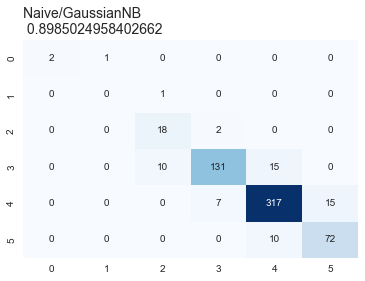

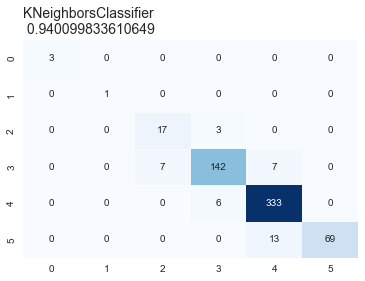

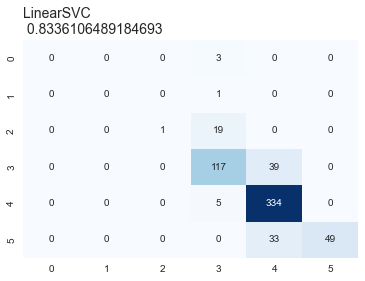

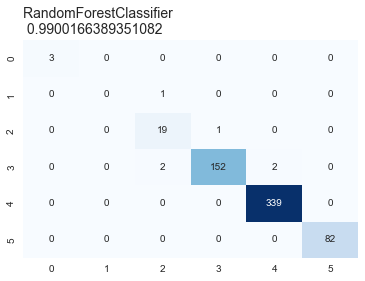

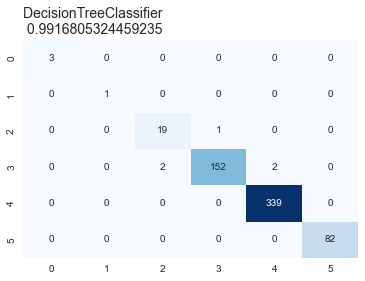

In [79]:
y_pred=gnb(X_train, y_train,X_test,0)
title="Naive/GaussianNB"
confisionMatrix(y_test, y_pred,title)

y_pred=knn(X_train, y_train,X_test,0)
title="KNeighborsClassifier"
confisionMatrix(y_test, y_pred,title)

y_pred=svm(X_train, y_train,X_test,0);
title="LinearSVC"
confisionMatrix(y_test, y_pred,title)

y_pred=rfc(X_train, y_train,X_test,0)
title="RandomForestClassifier"
confisionMatrix(y_test, y_pred,title)

y_pred=dtc(X_train, y_train,X_test,0)
title="DecisionTreeClassifier"
confisionMatrix(y_test, y_pred,title)

#### Testi

In [80]:
def test(luokka,item,nbr):    
    print()
    print(f'Testi {nbr}')
    display(item)      
    item=ss.transform(item)
    print()
    y_pred=dtc(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'DecisionTreeClassifier -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'DecisionTreeClassifier -> ennustettu: {y_pred}')
    y_pred=svm(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'LinearSVC -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'LinearSVC -> ennustettu: {y_pred}')
    
    y_pred=knn(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'knn -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'knn -> ennustettu: {y_pred}')
        
    y_pred=gnb(X_train, y_train,item,0)[0]
    
    if luokka!="":
        print(f'GaussianNB -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'GaussianNB -> ennustettu: {y_pred}')
        
    y_pred=rfc(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'RandomForestClassifier -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'RandomForestClassifier -> ennustettu: {y_pred}')


item=df3.loc[656:656]
print(item)

luokka=item['Grade'].values[0]
item.drop(['Grade'], axis=1,inplace=True)
test(luokka,item,1)

# Muokataan hieman dataa ja katsotaan tulos
#    km/h  Moving Time  Distance  Average Watts
# 22.819998      17522.0    111.07     262.348999

item['Distance']=55
item['Average Speed']=55/(7522/3600)
# Average Watts teho pidetään samana 

test("",item,2)

print("----------------")
item['Distance']=55
item['Average Speed']=55/(12522/3600)
item['Average Watts']=100

test("",item,3)


     Average Speed  Average Watts  Moving Time  Distance  Grade
656      26.239204     285.286987       3821.0     27.85      4

Testi 1


,Average Speed,Average Watts,Moving Time,Distance
656,26.239204,285.286987,3821.0,27.85



DecisionTreeClassifier -> luokka: 4 ennustettu: 4
LinearSVC -> luokka: 4 ennustettu: 4
knn -> luokka: 4 ennustettu: 4
GaussianNB -> luokka: 4 ennustettu: 4
RandomForestClassifier -> luokka: 4 ennustettu: 4

Testi 2


,Average Speed,Average Watts,Moving Time,Distance
656,26.322786,285.286987,3821.0,55



DecisionTreeClassifier -> ennustettu: 4
LinearSVC -> ennustettu: 2
knn -> ennustettu: 4
GaussianNB -> ennustettu: 4
RandomForestClassifier -> ennustettu: 4
----------------

Testi 3


,Average Speed,Average Watts,Moving Time,Distance
656,15.812171,100,3821.0,55



DecisionTreeClassifier -> ennustettu: 2
LinearSVC -> ennustettu: 2
knn -> ennustettu: 2
GaussianNB -> ennustettu: 3
RandomForestClassifier -> ennustettu: 2


```
Testi 1: kaikki menetelmät palauttivat oikein
Testi 2: LinearSVC ennusti poikkeavasti
Testi 3: GaussianNB ennusti poikkeavasti
```

## Syväoppiminen

Muodostetaan yksinkertainen neuroverkko Keras Sequential API:lla 

**sisäänmeno**\
Sisäänmeno 4 units, koska X_train aineisto sisältää 4 (features) eri muuttujaa \
'Average Speed', 'Average Watts', 'Moving Time', 'Distance'\
**ulostulo**\
Koska aktiviteettien luokitus on tehty kouluarvosanoin 0-5 \
pitää ulostulossa olla 6 units eli 6 eri vaihtoehtoista arvoa 0-5 \
**aktivointifunktio**\
Activation pitää olla softmax, jota käytetään moniluokkaluokituksen yhteydessä, \
muut aktivointifunktiot eivät toimi tässä tapauksessa. \
**häviöfunktio**\
loss pitää olla "sparse_categorical_crossentropy" em. syystä. \
**optimisaattori**\
optimizer joko Adam tai RMSProp, ei merkittävää eroa näiden välillä.

19/19 [==============================] - 0s 653us/step - loss: 0.2219 - accuracy: 0.9135
Test Loss:0.2219330221414566 Test Accuracy:91.34775400161743%


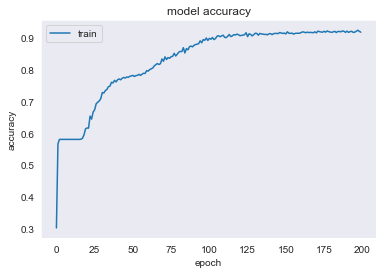

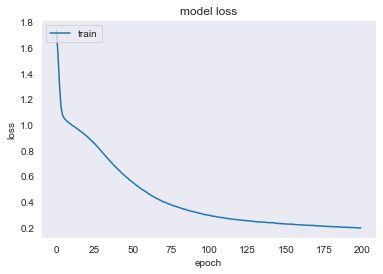

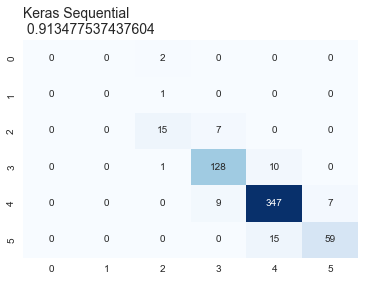

In [129]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


def ks(X_train, y_train,X_test,epochs,p):
    
    def history_accuracy(history):
        sns.set_style('dark')
        plt.figure()
        plt.plot(history.history['accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    
    
    def history_loss(history):
        sns.set_style('dark')
        plt.figure()
        plt.plot(history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    
    model = tf.keras.Sequential([
        Dense(4, activation='relu'),    
        Dense(6,activation='relu'),        
        Dense(6,activation='softmax')
    ])

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer='adam',
                  #optimizer='RMSProp',
                  metrics=['accuracy']
                  )

    history=model.fit(X_train,y_train,epochs=epochs,verbose=0)

    if p==1:
        results = model.evaluate(X_test, y_test, verbose=1)
        print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

    
    predict=model.predict(X_test) 
    y_pred=np.argmax(predict,axis=1)
    
    if p==1:
        title="Keras Sequential"
        history_accuracy(history)
        history_loss(history)
        confisionMatrix(y_test, y_pred,title)
    else:
        return y_pred
        
ks(X_train, y_train,X_test,200,1)


Kuten kaaviosta voidaan nähdä niin vähintään 100 epoch-koulutuskierrosta vaaditaan tyydyttävään/kohtuulliseen tulokseen.

## Tulosten analysointi

#### Menetelmien vertailua

In [133]:
method=[]
acc=[]

y_pred=ks(X_train, y_train,X_test,200,0)
title="Keras Sequential"
acc.append(accuracy_score(y_test, y_pred))
method.append(title)

y_pred=gnb(X_train, y_train,X_test,0)
title="Naive/GaussianNB"
acc.append(accuracy_score(y_test, y_pred))
method.append(title)

y_pred=knn(X_train, y_train,X_test,0)
title="KNeighborsClassifier"
acc.append(accuracy_score(y_test, y_pred))
method.append(title)

y_pred=svm(X_train, y_train,X_test,0);
title="LinearSVC"
acc.append(accuracy_score(y_test, y_pred))
method.append(title)

y_pred=rfc(X_train, y_train,X_test,0)
title="RandomForestClassifier"
acc.append(accuracy_score(y_test, y_pred))
method.append(title)

y_pred=dtc(X_train, y_train,X_test,0)
title="DecisionTreeClassifier"
acc.append(accuracy_score(y_test, y_pred))
method.append(title)

data={'Method':method,'Accuracy':acc}
data = pd.DataFrame(data)
display(data)

,Method,Accuracy
0,Naive/GaussianNB,0.896839
1,KNeighborsClassifier,0.920133
2,LinearSVC,0.782030
3,RandomForestClassifier,0.996672
4,DecisionTreeClassifier,1.000000


```
Voidaan havaita, että ko. parametreilla syväsoppimismenetelmä tämän aineiston osalta eii loista vaan moni 
koneoppimismenetelmä ylsi parempaan tulokseen. Joten kannattaa vertailla/testailla eri menetelmiä sekä 
parametreja ja löytää paras menetelmä juuri ko. aineistolle.
Joissakin tapauksissa yksinkertaisemmat menetelmät voivat
olla paitsi tehokkaampia niin myös parempia vaihtoehtoja. Tämänkin seikan takia kannattaa aina kokeilla useampaa kuin
yhtä koneoppimismenetelmää aineiston kanssa ja vertailla niistä saatuja tuloksia toisiinsa.

```

#### Aineistosta
Kieltämättä aineisto ei ollut tasalaatuista kun tiettyä dataa puuttui, esikäsittely sinäänsä ei ollut ongelmia 
kun tunnisti puutteellisen sekö virheellisen datan. Stravan majsuyllinen...
Pyöräilyynnliittyvöt tekijät vissiin alkuun eik tänne Strava
Uusi viime vuosien data ei ole puutteelista johtuen uudemmista mittavälineistä 

Misät johtuu puuttuva data, osa datasta on tuotu toisesta palvelusta jolloin Strava ei nähtävästi käsittele dataa eli ei laske joitakin suureita vaan silloin kun uusi data on tuote niin tiedot lisätään ja lasketaan... 

#### Luokittelusta
Suuri osa suorituksista luokitellaan 4:n arvoisiksi. Ei ole kaukaa haettu, mutta voisi toki tehdä pientä hienosäätöä, ottaen huomioon myös oman kokemuksen ja ns. perstuntuman.

Koska on kyse omasta datasta niin tärkeää olisi huomioida myös kokemuspohjainen perstuntuma ja otata tämäkin huomioon yhtenä tekijänä luokittelua tehdessä
Kun itse arvion suorituksen taso ja onnistumista kiinnitän huomion keskinopeuteen suhteytettuna matkan pituuteen.
eli ihan peruskamaa, mutta nopeuteen vaikuttaa monet asiat mm. sääolosuhteet lämpötila tuuli reitin maasto, pyörä,
tienpinta asfaltti/hiekkatie/maasto
Korrrelaatiotaulukon perusteella 


In [127]:
display(df3['Grade'].value_counts())

4    1410
3     586
5     302
2      94
0       7
1       5
Name: Grade, dtype: int64

#### Kehitettävää
Syväoppimismalli on varmaankin yksinkertaisin mahdollinen tähän aineistoon. Mallia voisi kehittää lisäämällä kerroksia, kohtalaisen hyvin toimii "karvalakki"-versiollakin.


Oma suoritusten luokitus 0-5 vois kenties vielä kehittää todenmukaisemmaksi, mutta tässä ja nyt ihan ok.

Olisi hyvä saada tätähkin dataa tai sitten ei.
Toki suorituksiin vaikuttaa mm. sääolosuhteer lämpötila,tuulenopeus ja-suunta, vuodenajat yms. tä 
varustus välineet
Stravan maksullinen
Pyöräilysuoritukseen vaikutta hyvin moini asia, joista sää on kenties tärkein, lislksi varustus, vireystila yms. Stravan maksullinen versio voisi antaa suuremman joukon eri paramtreja/muuttujia/suureita

Koska sää on hyvin merkittävä tekijä suorituksen onnistumiseen niin sää dataa olisi hyvä saada kunkin suorituksen yhteyteen. Stravan maksullinen versio taitaa nuo tietodot sisältää, tiedot voitaneen hakea jostakin sääpalvelusta esim. 
https://openweathermap.org/

Loppuun
Strava-palvelun maksullisella versiolla saadaa huomattavasti enemmän dataa mahd. myös sää tietoja ko. suorituksen aikna lämpötiöa tuuli yms.
https://www.strava.com/clubs/231407/posts/9470686
Itselläni ei ollut ko.     
Voitaisiin toki hakea jostakin palvelusta ja lisätä jotakin tietoja mutta miten sitä soveltaa onkin toinen juttu
mutta sää olosuhteilla on hyvinkin suuri vaikutus koska mm. vuodenajat ovat erilaiset 
Voitaissin ottaa huomioon sääolosuhteiden vaikutus
https://www.worldweatheronline.com/weather-api/
https://openweathermap.org/api

Mutta viisanta jos haluaa hyödyntää säädataa on hamkkia Stravan maksullinen verio, jolloin ko datan saa suoraan omiin sarakkeihinsa ja on tallessa yhdessä paikassa.

Wind and Temperature mahd. rain snow water ice/snow/ minu s degrees
#############


Huomiotavaa olisi 
1. Weather Condition
2. Day of the Week and Weekend


https://towardsdatascience.com/classification-regression-and-prediction-whats-the-difference-5423d9efe4ec


Luokittelussa olis voinut käyttää muitakin suureita mm. Calories mutta koska datassa oli paljon puuttteita niin se heivattiin pois laskuista. Nythän on niin, että kaikki uusi data on eheämpää ja vähemmän puuttellista. Joten jatkossa 
uusimman datan (viime vuodet) voisi vertailun vuoksi kehitää luokittelua paremmaksi, toki omaan empiiriseen kokemusta pitäis myös hyödyntää luokitusrajoijen määrittelyssä. Nyt jako tehtiin maximin ja minimin väli jakamalla tasaisiin osiin.
Mallien tomivuu





#### Huomioita
